In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetic_data = pd.read_csv('diabetic_data.csv')

In [50]:
len(diabetic_data)

101766

In [3]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Analyze encounter_id
Description: "Unique identifier of an encounter"

Would have expected to see a uniform distributino of encounter IDs, given that an encounter with an IID patient should happen just as fewquently for any given patient.

Instead, it appears that the median ID is correlated with the highest frequence of encounters????

This must be an artifact from how IDs are given out (some hospitals gave out sequential IDs, while others gave out random IDs, and still others gave out sequential IDs seperated by 1000, etc.).


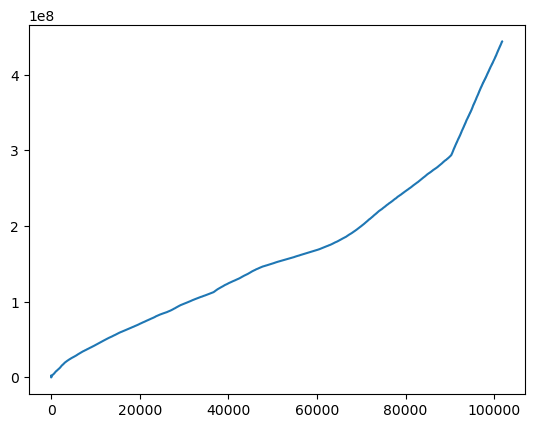

In [13]:
plt.plot(diabetic_data.encounter_id)

(array([10493., 16574., 16064., 20683., 10720.,  9958.,  7039.,  3438.,
         3346.,  3451.]),
 array([1.25220000e+04, 4.43979920e+07, 8.87834620e+07, 1.33168932e+08,
        1.77554402e+08, 2.21939872e+08, 2.66325342e+08, 3.10710812e+08,
        3.55096282e+08, 3.99481752e+08, 4.43867222e+08]),
 <BarContainer object of 10 artists>)

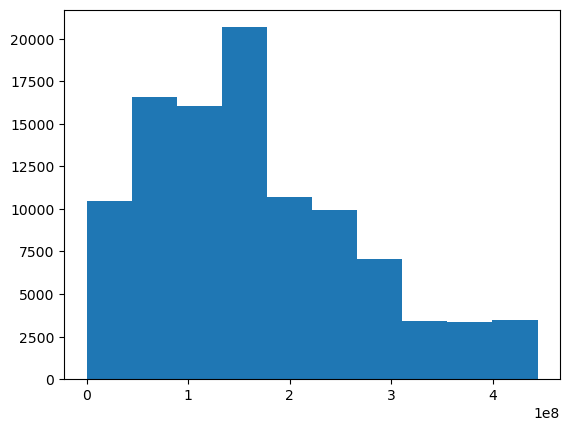

In [11]:
plt.hist(diabetic_data.encounter_id)

In [47]:
# no repeats
len(diabetic_data.encounter_id) - len(diabetic_data.encounter_id.unique())

0

# Analyze patient_nbr
"Unique identifier of a patient"

It would appear that larger patient numbers correlate with newer patients, given the number of repeats is way down for larger numbers in a seemingly significant manner.

(array([20481., 19240., 16184., 11037., 17908., 12886.,  1594.,  1161.,
          429.,   846.]),
 array([1.35000000e+02, 1.89503834e+07, 3.79006318e+07, 5.68508802e+07,
        7.58011286e+07, 9.47513770e+07, 1.13701625e+08, 1.32651874e+08,
        1.51602122e+08, 1.70552371e+08, 1.89502619e+08]),
 <BarContainer object of 10 artists>)

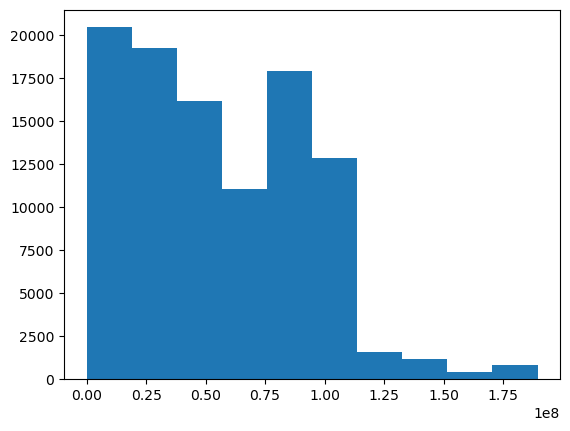

In [15]:
plt.hist(diabetic_data.patient_nbr)

In [48]:
len(diabetic_data.patient_nbr) - len(diabetic_data.patient_nbr.unique())

30248

In [49]:
len(diabetic_data.patient_nbr)

101766

# Analyze race

In [16]:
diabetic_data.race.unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

(array([76099.,     0., 19210.,     0.,  2273.,     0.,  1506.,     0.,
          641.,  2037.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

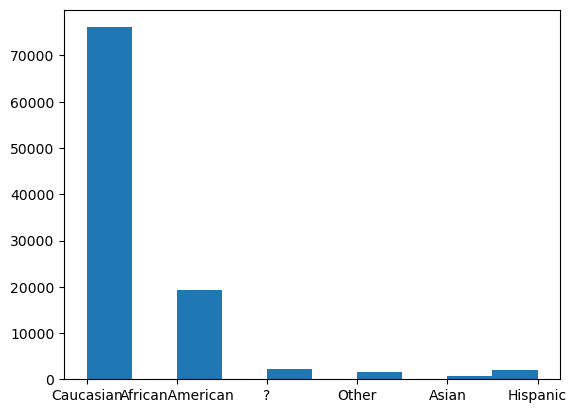

In [17]:
plt.hist(diabetic_data.race)

# Analyze gender

In [19]:
diabetic_data.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

(array([5.4708e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.7055e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

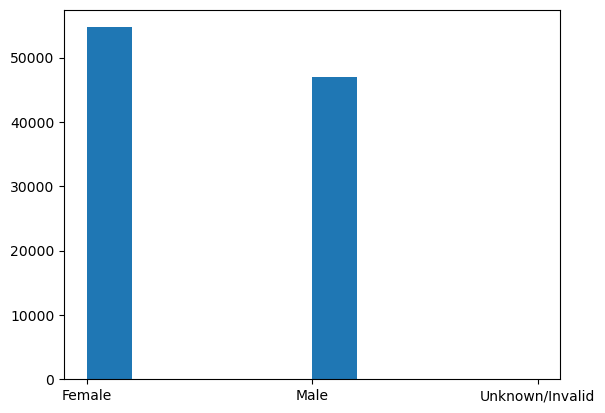

In [20]:
plt.hist(diabetic_data.gender)

# Analyze age

In [22]:
diabetic_data.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

(array([  161.,   691.,  1657.,  3775.,  9685., 17256., 22483., 26068.,
        17197.,  2793.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

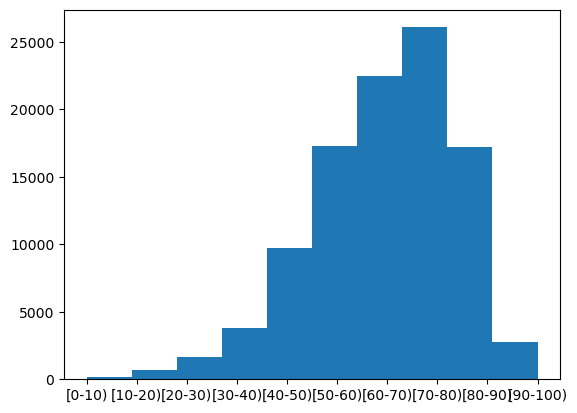

In [21]:
plt.hist(diabetic_data.age)

# Analyze weight

(array([9.8569e+04, 1.3360e+03, 8.9700e+02, 4.8000e+01, 6.2500e+02,
        9.7000e+01, 1.4500e+02, 1.1000e+01, 3.5000e+01, 3.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

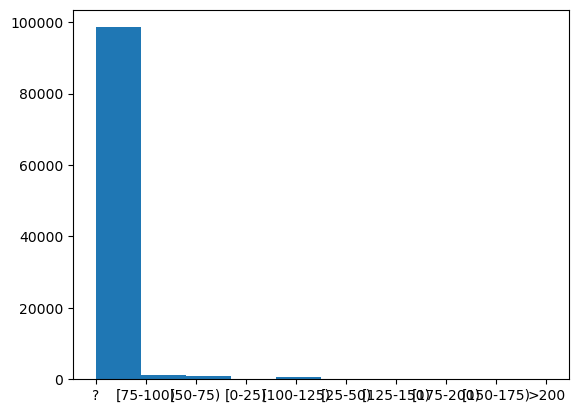

In [25]:
plt.hist(diabetic_data.weight)

(array([1336.,  897.,   48.,  625.,    0.,   97.,  145.,   11.,   35.,
           3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

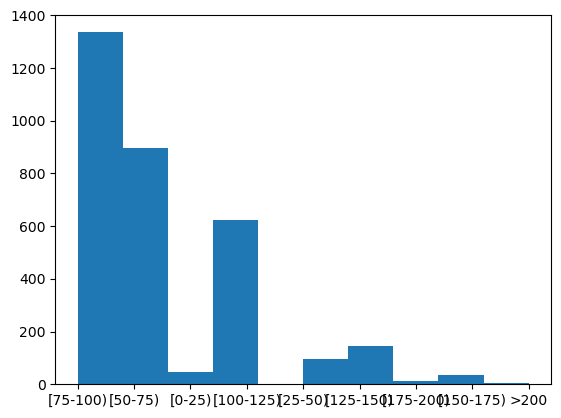

In [27]:
# without unknowns
plt.hist(diabetic_data.weight[diabetic_data.weight!='?'])

# Analyze admission_type_id

In [34]:
np.sort(diabetic_data.admission_type_id.unique())

array([1, 2, 3, 4, 5, 6, 7, 8])

(array([5.3990e+04, 1.8480e+04, 1.8869e+04, 0.0000e+00, 1.0000e+01,
        4.7850e+03, 0.0000e+00, 5.2910e+03, 2.1000e+01, 3.2000e+02]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

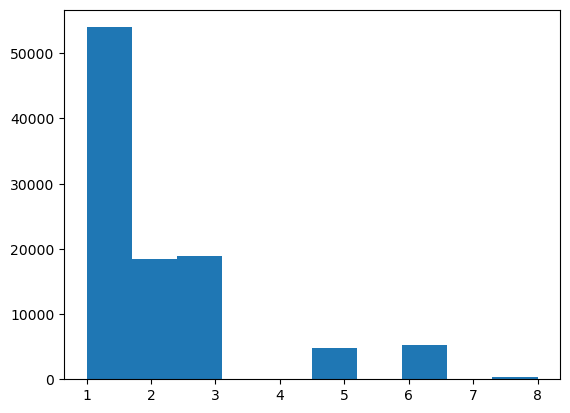

In [40]:
plt.hist(diabetic_data.admission_type_id)

# Analyze discharge_disposition_id

In [37]:
np.sort(diabetic_data.discharge_disposition_id.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 22, 23, 24, 25, 27, 28])

(array([76316., 14901.,   752.,  1648.,   774.,    88.,  3699.,  1995.,
         1449.,   144.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

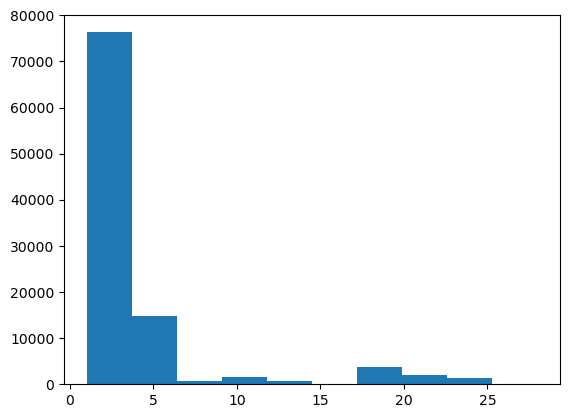

In [39]:
plt.hist(diabetic_data.discharge_disposition_id)

# Analyze time_in_hospital

(array([31432., 17756., 13924., 17505.,  5859.,  4391.,  5344.,  1855.,
         1448.,  2252.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

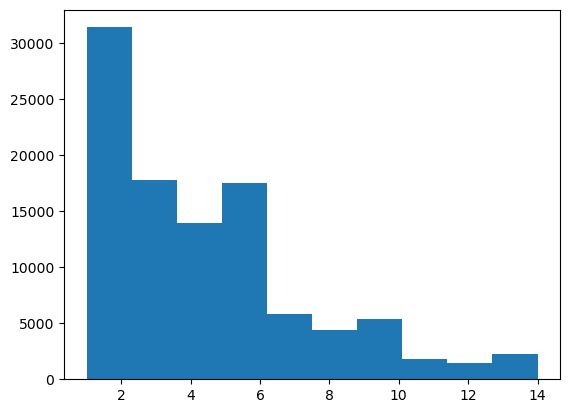

In [41]:
plt.hist(diabetic_data.time_in_hospital)

# Analyze payer_code

(array([72695.,  9806.,  7103.,  5007.,  2588.,  2486.,   146.,   727.,
         1128.,    80.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

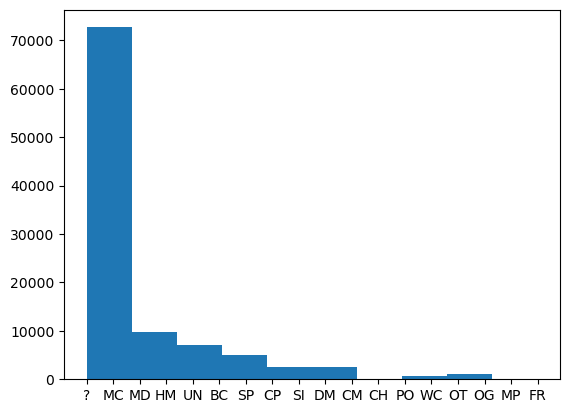

In [43]:
plt.hist(diabetic_data.payer_code)

In [45]:
list(diabetic_data.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [4]:
IDS_mapping = pd.read_csv('IDS_mapping.csv')

In [5]:
IDS_mapping

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center
